# Project 1:  Clustering Algorithms

## Assignment Overview

### Objective:
To provide students with hands-on experience in implementing clustering techniques on real-world datasets.

### About the data:
The Economist Democracy Index is an annual index compiled by the UK-based magazine, The Economist,   
through its Economist Intelligence Unit (EIU). This index rates the state of democracy across countries worldwide.    
  
It is based on five categories:

- **Electoral Process and Pluralism:**   
This measures the fairness of elections, the freedom to form political parties, and the participation of various groups in the political process.  

- **Functioning of Government:** This evaluates how effectively governments operate, the quality of governance, the level of corruption, and whether political decisions are made in a transparent manner. 

- **Political Participation:** This assesses the level of public involvement in politics, including voter turnout, membership in political parties, and engagement with political issues. 
 
- **Political Culture:** This looks at the societal norms and attitudes towards politics, including the extent to which different viewpoints are tolerated and the relationship between government and religion. 

- **Civil Liberties:** This gauges the extent of individual freedoms, including freedom of speech, freedom of the press, and the right to protest. 


**Countries are classified into four types of regimes based on their scores:**
 
- Full democracies 
- Flawed democracies 
- Hybrid regimes 
- Authoritarian regimes 

The Democracy Index is widely referenced in political and academic circles as a comprehensive measure of the state of democracy globally.   
It provides a snapshot of the health of democracy in each country and also allows for comparisons across countries and over time. 

[Additional information on Democracy Index ](https://en.wikipedia.org/wiki/The_Economist_Democracy_Index)

## Step 1: Access the dataset for use in your Notebook.   

You can find a csv version of this dataset already installed in your lab as `democracy_index.csv`, or download it for local use through 
[this link](https://github.com/JustGlowing/minisom/blob/master/examples/democracy_index.csv). 

## **Step 2:**  Clustering Implementation (Tasks) 

Please follow and complete each step below to complete the assignment.

### **Task 1:** Load the democracy index data set 

##### <u>RESPONSE (Task 1)</u>
Please see loaded dataset below

In [1]:
import os, warnings
os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np                                             # importing all needed libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, warnings
from sklearn.cluster import KMeans

df = pd.read_csv('democracy_index.csv')
df

,Unnamed: 0,rank,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category
0,0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy
1,1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy
2,2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy
3,3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy
4,4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy
...,...,...,...,...,...,...,...,...,...,...
162,162,163,Chad,1.61,0.00,0.00,1.67,3.75,2.65,Authoritarian
163,163,164,Central African Republic,1.52,2.25,0.00,1.11,1.88,2.35,Authoritarian
164,164,165,Democratic Republic of the Congo,1.49,0.50,0.71,2.22,3.13,0.88,Authoritarian
165,165,166,Syria,1.43,0.00,0.00,2.78,4.38,0.00,Authoritarian


In [2]:
# lets drop the unnamed: 0 column, not needed, makes the data confusing 

df = df.drop(columns=['Unnamed: 0'])
df

,rank,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category
0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy
1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy
2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy
3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy
4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy
...,...,...,...,...,...,...,...,...,...
162,163,Chad,1.61,0.00,0.00,1.67,3.75,2.65,Authoritarian
163,164,Central African Republic,1.52,2.25,0.00,1.11,1.88,2.35,Authoritarian
164,165,Democratic Republic of the Congo,1.49,0.50,0.71,2.22,3.13,0.88,Authoritarian
165,166,Syria,1.43,0.00,0.00,2.78,4.38,0.00,Authoritarian


In [3]:
# lets make the rank the index, so easier to identify rows by rank and already ordered from 1-167, makes things less confusing
df = df.set_index('rank')
df

# went from 10 to 8 columns 

,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category
rank,,,,,,,,
1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy
2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy
3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy
4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy
5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy
...,...,...,...,...,...,...,...,...
163,Chad,1.61,0.00,0.00,1.67,3.75,2.65,Authoritarian
164,Central African Republic,1.52,2.25,0.00,1.11,1.88,2.35,Authoritarian
165,Democratic Republic of the Congo,1.49,0.50,0.71,2.22,3.13,0.88,Authoritarian


### **Task 2:**  Filter the dataset to choose the five categories/columns mentioned above to prepare for clustering countries into different regimes

##### <u>RESPONSE (Task 2)</u>
Please see filtered dataset below of 5 categories/columns

In [4]:
# Selecting columns of the the 5 categories
index_scores_5_categories = df[[
    'electoral_processand_pluralism',
    'functioning_of_government',
    'political_participation',
    'political_culture',
    'civil_liberties']]

index_scores_5_categories


,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties
rank,,,,,
1,10.00,9.64,10.00,10.00,9.71
2,10.00,9.29,8.89,10.00,9.71
3,9.58,9.64,8.33,10.00,9.41
4,10.00,9.29,8.89,8.13,10.00
5,10.00,9.29,8.33,9.38,9.12
...,...,...,...,...,...
163,0.00,0.00,1.67,3.75,2.65
164,2.25,0.00,1.11,1.88,2.35
165,0.50,0.71,2.22,3.13,0.88


### **Task 3:**  Preprocess the data (if necessary), such as normalizing or scaling the features 
**a:** Find out why we need to maintain a uniform scale across the variables for K-means and Hierarchical clustering

**b:** Do we need to use scaling techniques for this dataset? If yes, apply the preprocessing.


##### <u>a) RESPONSE (Task 3)</u>
For K-means and Hierarchical clustering, its important to maintain a uniform scale across the variables because both 
K-means and Hierarchical clustering use distance calculations such as Ecuclidean distance to measure similarity between the datapoints, so if one category has larger ranges then it could sway the clustering results to a biased one. to avoid this, we would need to scale or normalize all the variables to a common range.

In [5]:
# Lets check the mean, max, mins, var, std and see the scoring ranges for each category
index_scores_5_categories.describe()


,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties
count,167.000000,167.000000,167.00000,167.000000,167.000000
mean,5.902934,4.884671,5.24976,5.593952,5.768263
std,3.540180,2.522545,1.87654,1.647974,2.676157
min,0.000000,0.000000,1.11000,1.250000,0.000000
25%,3.000000,2.860000,3.89000,4.380000,3.530000
50%,6.580000,5.000000,5.56000,5.630000,5.880000
75%,9.170000,6.790000,6.67000,6.250000,8.240000
max,10.000000,9.640000,10.00000,10.000000,10.000000


In [6]:
# Lets check the spread of the data 
index_scores_5_categories.var()


electoral_processand_pluralism    12.532874
functioning_of_government          6.363231
political_participation            3.521404
political_culture                  2.715817
civil_liberties                    7.161818
dtype: float64

##### <u>b) RESPONSE (Task 3)</u>
We need to use scaling for this because the st and variance vary greatly between the 5 categories, meaning that the data with the bigger spread will sway the results, so we need to scale before clustering. 

In [7]:
# Preprocessing (normalizing) dataset index_scores_5_categories

from sklearn.preprocessing import StandardScaler

# Scaler tool, store StandardScaler() to variable to can use for later if needed, learns from std and mean
scaler = StandardScaler()

# fitting the scaler to dataset and transforming it 
# fit calc mean and std from the 5 columns, 
# Transform does z score formula for every data point, now dataset scaled and contributes equaly when clustering
scaled_data = scaler.fit_transform(index_scores_5_categories) 

#checking data type
type(scaled_data)
print(scaled_data[:5])

#NumPy array back to dataframe so can see column names nicely along with the index
scaled_df = pd.DataFrame(scaled_data, columns = index_scores_5_categories.columns, index = index_scores_5_categories.index)

scaled_df.head()


[[1.16078504 1.89080153 2.53899474 2.68165664 1.47733893]
 [1.16078504 1.75163545 1.94570167 2.68165664 1.47733893]
 [1.0417902  1.89080153 1.64638265 2.68165664 1.36490075]
 [1.16078504 1.75163545 1.94570167 1.54351697 1.58602917]
 [1.16078504 1.75163545 1.64638265 2.30430552 1.25621051]]


,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties
rank,,,,,
1,1.160785,1.890802,2.538995,2.681657,1.477339
2,1.160785,1.751635,1.945702,2.681657,1.477339
3,1.041790,1.890802,1.646383,2.681657,1.364901
4,1.160785,1.751635,1.945702,1.543517,1.586029
5,1.160785,1.751635,1.646383,2.304306,1.256211


In [8]:
# check if std and mean were scaled 
scaled_df.describe().loc[['mean', 'std']]

# checks out all means 0 and stds 1

,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties
mean,0.000000,2.552848e-16,-2.127373e-16,-4.254747e-17,0.000000
std,1.003008,1.003008e+00,1.003008e+00,1.003008e+00,1.003008


### **Task 4:**  Implement K-means 
Now we implement K-means clustering to categorize the data into clusters in the following steps:

**a:** Use elbow method to determine number of clusters to use for K-means. After finding the optimal number of clusters, fit the K-means model with that number of clusters.

**b:** Verify if the solution offered by the elbow method and the actual solution (number of regimes) match.

**c:** Did we really need to use elbow method to determine the number of clusters for this dataset?   


##### <u>a) RESPONSE (Task 4)</u>
I tested the Elbow Method to determine the number of clusters for the K-Means. Based on the plot, the Elbow Curve starts flattening around k = 4, so I tested k = 4 when fitting the KMeans Model. Each country was assigned to one of the 4 clusters based on the five democracy index scores (the 5 columns). 



In [9]:
# testing a number of k values 1-10 (finding the best # of clusters)
k_values = range(1, 21)

# inertia (WCSS, sum of the squared distances between each point and its cluster centroid) 
# WCSS measures how well the data points are clustered around their respective centroids
# for each k value (2-10), we run K-Means and calculate the Inertia 
# lower inertia tighter clusters 
# more clusters (increasing k values) inertia decrease because each data point gets closer to its cluster's centroid. 
# However there is a point when adding more clusters results in only small decrease in Inertia (the elbow)
# before elbow: Increasing k significantly reduces WCSS, indicating that new clusters effectively capture more of the data's variability.
# after elbow: Adding more clusters results in a minimal reduction in WCSS, 
# suggesting that these extra clusters may not be necessary and could lead to overfitting (elbow shows optimal # of clusters)
inertia = []

# loop through each k and fit K-Means
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)



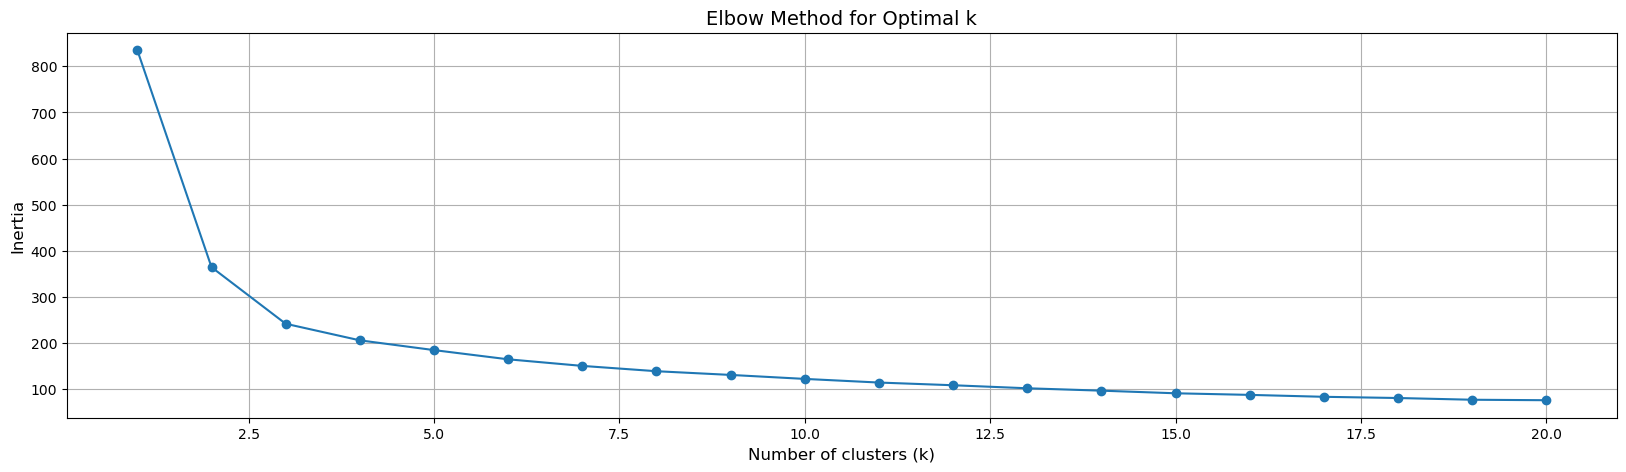

In [10]:
# Plot data and see if there is an Elbow Curve
plt.figure(figsize=(20,5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True)
plt.show()

# The Elbow Curve starts flattening around k = 4, so I will test k = 4 when fitting the KMeans Model

In [11]:
# lets look at the table of the graph above for numeric details, creating df dictionary
k_val_inertia_val = pd.DataFrame({'k': list(k_values), 'Inertia': inertia})
k_val_inertia_val

,k,Inertia
0,1,835.000000
1,2,364.517425
2,3,241.869964
3,4,205.914847
4,5,184.752704
5,6,164.771918
6,7,150.495157
7,8,138.962096
8,9,130.917762
9,10,122.277993


In [12]:
# Fitting the K-Means Model with k = 4
# choosing my k = 4 based on my elbow
k_4test = 4

# creating and fitting the model 
kmeans_4 = KMeans(n_clusters=k_4test, n_init=25, random_state=42)
kmeans_4.fit(scaled_df)

# adding column cluster to see which rows belong to which cluster 1-4 
scaled_df['Cluster_4'] = kmeans_4.labels_

scaled_df

,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,Cluster_4
rank,,,,,,
1,1.160785,1.890802,2.538995,2.681657,1.477339,1
2,1.160785,1.751635,1.945702,2.681657,1.477339,1
3,1.041790,1.890802,1.646383,2.681657,1.364901,1
4,1.160785,1.751635,1.945702,1.543517,1.586029,1
5,1.160785,1.751635,1.646383,2.304306,1.256211,1
...,...,...,...,...,...,...
163,-1.672426,-1.942230,-1.913376,-1.122286,-1.168706,2
164,-1.034953,-1.942230,-2.212695,-2.260426,-1.281144,2
165,-1.530765,-1.659922,-1.619402,-1.499637,-1.832091,2


##### <u>b) RESPONSE (Task 4)</u>
The results of the K-Means with k=4 resulted in a balanced cluster of [38, 33, 47, 49]. Since the Democracy Index is divided into 4 regimes of Full, Flawed, Hybrid, Authoritarian the k=4 value matches well, supporting 4 clusters. 

In [13]:
# how many countries are grouped into each cluster
scaled_df['Cluster_4'].value_counts().sort_index()


Cluster_4
0    38
1    33
2    47
3    49
Name: count, dtype: int64

In [14]:
# Just testing out k = 5 to compare with k = 4 (see previous code)
k_5test = 5

# creating and fitting the model 
kmeans_5 = KMeans(n_clusters=k_5test, n_init=25, random_state=42)
kmeans_5.fit(scaled_df.drop(columns='Cluster_4'))

# temporary Series so doesn't change original scaled_df
cluster5_labels = pd.Series(kmeans_5.labels_, name='Cluster_5')

# how many countries are grouped into each cluster
cluster5_labels.value_counts().sort_index()


Cluster_5
0    17
1    43
2    25
3    42
4    40
Name: count, dtype: int64

##### <u>c) RESPONSE (Task 4)</u>
I don’t think it was necessary to use the Elbow Method to find the number of clusters in this dataset, since the Democracy Index is already defined by four regimes. We could have just started with k = 4 right away. Still, I found the Elbow Method really helpful for confirming and validating my choice, especially by seeing where the curve starts to flatten. I would definitely keep using it in the future to double-check my k-values. 

### **Task 5:**  Implement Hierarchical clustering 

Try implementing Hierarchical clustering as follows:

**a:**	Using an appropriate linkage method, apply hierarchical clustering and produce the dendogram.

**b:** Try a different linkage criterion and repeat the steps of part 5a.

##### <u>a) RESPONSE (Task 5)</u>
I applied hierarchical clustering on the five democracy categories: Electoral Process and Pluralism, Functioning of Government, Political Participation, Political Culture, and Civil Liberties, to group countries based on their similarities. Different linkage methods (Ward, Complete, Average, and Single) were used, and their respective dendrograms were plotted to visualize how the countries cluster.

Ward showed clear groupings (3 groups, left 1 orange, right 2 green, looking horizontally), complete showed not as clear groupings(tigher) the same with average linkage and single showed chaining.

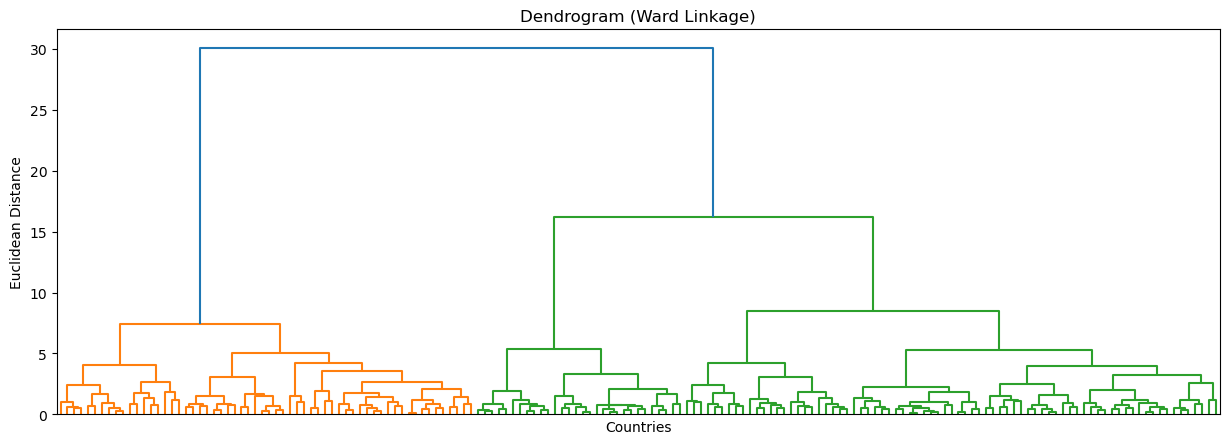

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

# using the scaled_df will droop column cluster_4 because not needed for this 
scaled_df_HC = scaled_df.drop(columns='Cluster_4')

# Hierarchical Clustering Linkage, WARD (
linked_ward = linkage(scaled_df_HC, method='ward')

# Dendrogram
plt.figure(figsize=(15, 5))
dendrogram(linked_ward, no_labels=True)   #Country labels overlapping so got rid of labels 
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance')
plt.show()

##### <u>b) RESPONSE (Task 5)</u>
Ward showed clear groupings, complete showed tighter groupings, average showed moderate grouping, single showed chaining. 

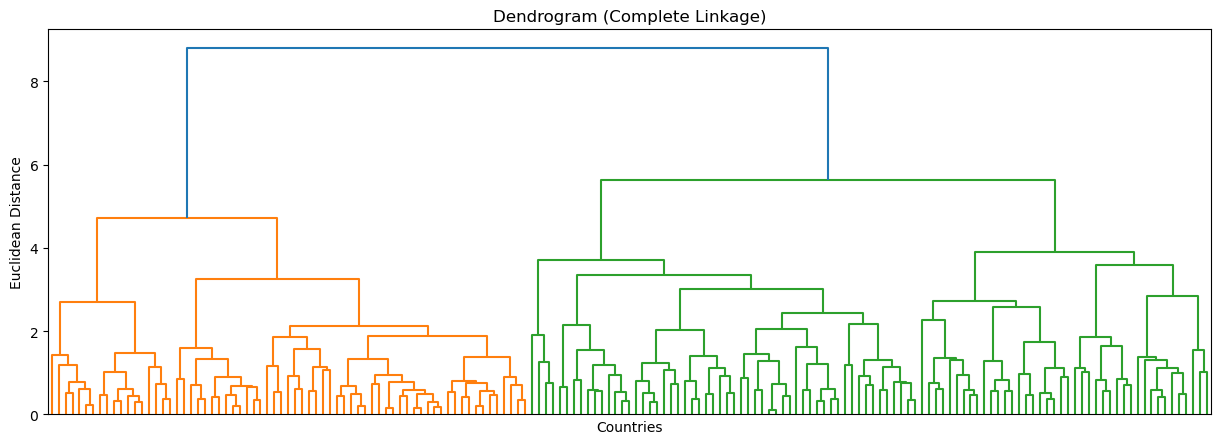

In [16]:
# Hierarchical Clustering Linkage, COMPLETE
linked_complete = linkage(scaled_df_HC, method='complete')

# Dendrogram
plt.figure(figsize=(15, 5))
dendrogram(linked_complete, no_labels=True)   #Country labels overlapping so got rid of labels 
plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance')
plt.show()

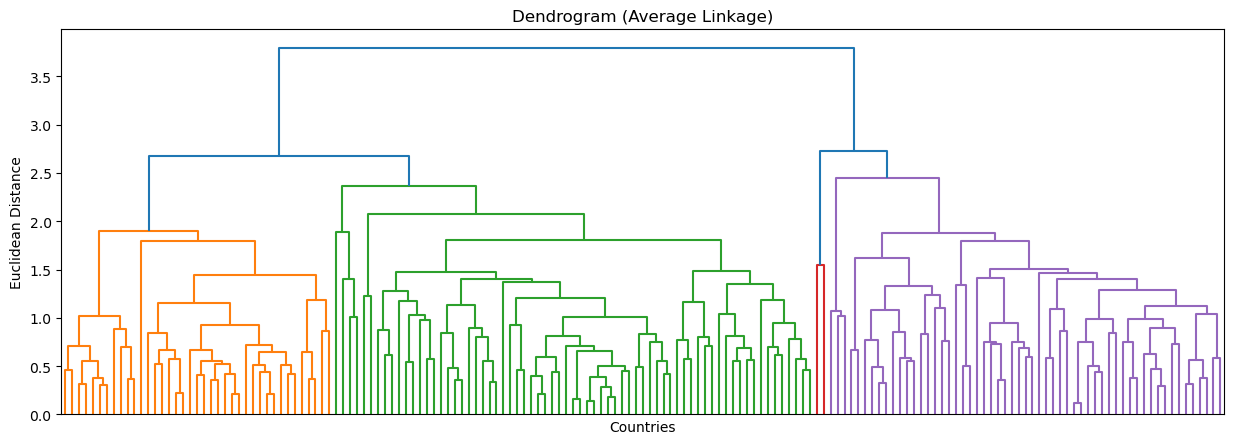

In [17]:
# Hierarchical Clustering Linkage, AVERAGE
linked_average = linkage(scaled_df_HC, method='average')

# Dendrogram
plt.figure(figsize=(15, 5))
dendrogram(linked_average, no_labels=True)   #Country labels overlapping so got rid of labels 
plt.title('Dendrogram (Average Linkage)')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance')
plt.show()

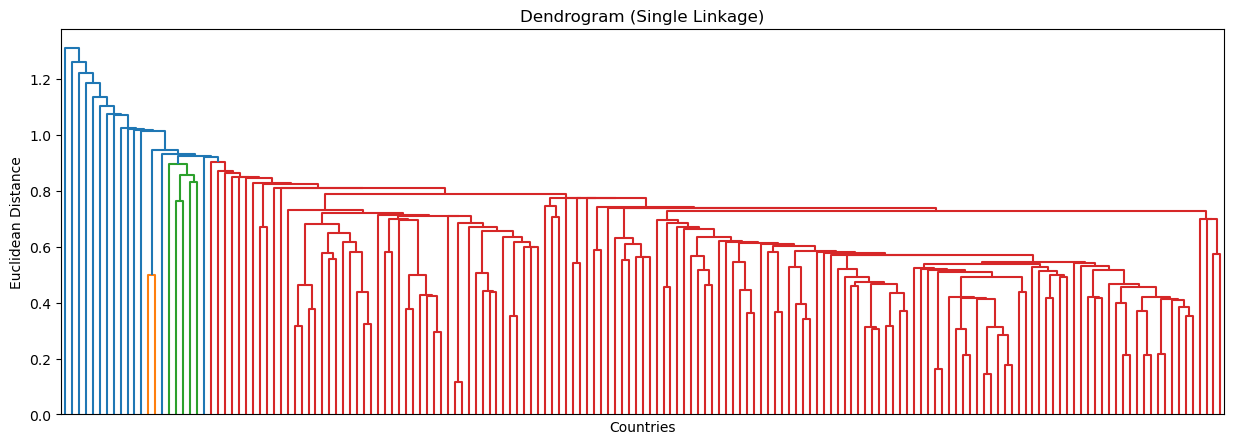

In [18]:
# Hierarchical Clustering Linkage, SINGLE
linked_single = linkage(scaled_df_HC, method='single')

# Dendrogram
plt.figure(figsize=(15, 5))
dendrogram(linked_single, no_labels=True)   #Country labels overlapping so got rid of labels 
plt.title('Dendrogram (Single Linkage)')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance')
plt.show()

### **Task 6:** Plot the democracy index values

For all the methods that you implemented, generate the clustering solution. The clustering solution simply groups the countries into different groups based on similarity. When you generate the clustering solution, you need to print or visualize it in some way (could be in the form of lists, arrays or tabular form etc). Once the solution is obtained, pick one of the solutions and plot density plots of democracy index values considering all the countries within a group. The results should give you a density plot per group in the clustering solution of your choice. 

##### <u> Task 6 RESPONSE</u>
The crosstab between the original category column and the Ward linkage clustering solution shows a strong alignment. Cluster 2 includes all full democracies, Cluster 1 consists entirely of authoritarian regimes, and Cluster 0 groups most flawed and hybrid democracies together. This confirms that the clustering approach effectively grouped countries based on their democracy characteristics, closely matching the Economist’s real-world regime classifications.

##### please see output [23]
##### cluster_ward 0 = 6.2 avg democ index    Flawed/Hybrid Democracies
##### cluster_ward 1 = 3.0 avg democ index    Authoritarian Regimes
##### cluster_ward 2 = 8.5 avg democ index    Full Decomcracies 

In [19]:
from sklearn.cluster import AgglomerativeClustering

# Lets find out the clustering solution by Agglomerative Clustering using Ward Linage (since we can see 3 clear groupings)
# so we'll keep merging countries based on the 5 categories (democracy scores) until we reach only 3 clusters 
ward_HC = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the model then assign cluster label (one of these labels 0,1,2) 
scaled_df_HC['Cluster_Ward'] = ward_HC.fit_predict(scaled_df_HC)

scaled_df_HC.head()


,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,Cluster_Ward
rank,,,,,,
1,1.160785,1.890802,2.538995,2.681657,1.477339,2
2,1.160785,1.751635,1.945702,2.681657,1.477339,2
3,1.041790,1.890802,1.646383,2.681657,1.364901,2
4,1.160785,1.751635,1.945702,1.543517,1.586029,2
5,1.160785,1.751635,1.646383,2.304306,1.256211,2


In [20]:
# confirms countries were clustered into 3 groups 
scaled_df_HC['Cluster_Ward'].value_counts()

Cluster_Ward
0    77
1    60
2    30
Name: count, dtype: int64

In [21]:
# Make sure indexes align, otherwise merge by 'country'
df['Cluster_Ward'] = scaled_df_HC['Cluster_Ward']
df

,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category,Cluster_Ward
rank,,,,,,,,,
1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy,2
2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy,2
3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy,2
4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy,2
5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy,2
...,...,...,...,...,...,...,...,...,...
163,Chad,1.61,0.00,0.00,1.67,3.75,2.65,Authoritarian,1
164,Central African Republic,1.52,2.25,0.00,1.11,1.88,2.35,Authoritarian,1
165,Democratic Republic of the Congo,1.49,0.50,0.71,2.22,3.13,0.88,Authoritarian,1


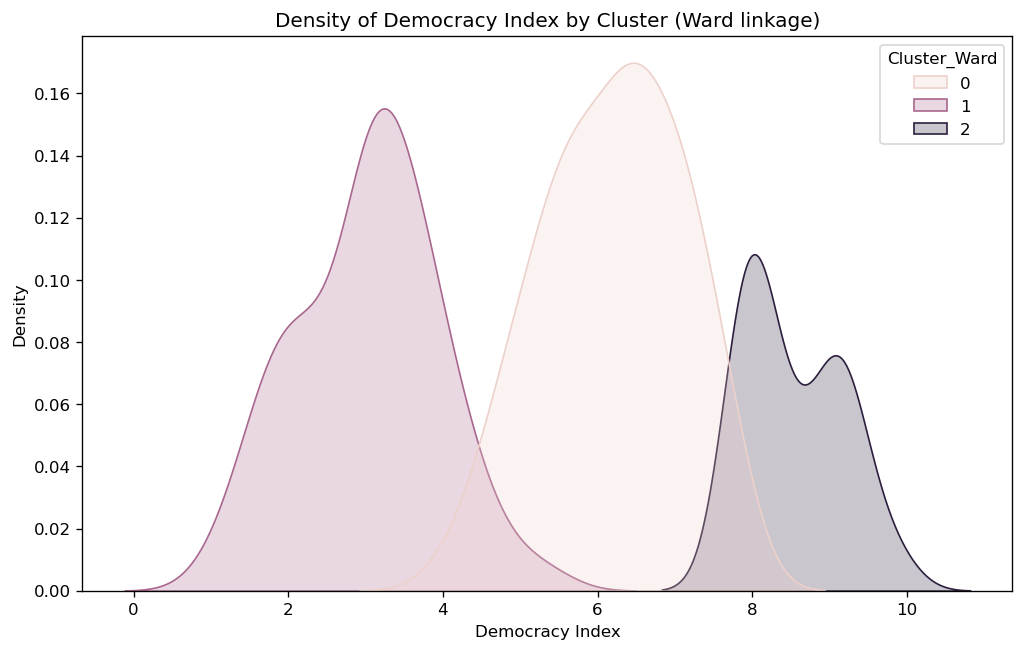

In [22]:
# density Plot below based on Cluster_Ward and Democracy Index
plt.figure(figsize=(10,6), dpi=120)
sns.kdeplot(data=df, x='democracy_index', hue='Cluster_Ward', fill=True)
plt.title('Density of Democracy Index by Cluster (Ward linkage)')
plt.xlabel('Democracy Index')
plt.ylabel('Density')
plt.show()


In [23]:
#Lets find the average democracy_index and see which cluster has high, Mod, and low democracy scores
df.groupby('Cluster_Ward')['democracy_index'].mean()

Cluster_Ward
0    6.199870
1    3.025000
2    8.534333
Name: democracy_index, dtype: float64

#### RESULTS (when grouping):
##### cluster_ward 0 = 6.2 avg democ index    Flawed/Hybrid Democracies
##### cluster_ward 1 = 3.0 avg democ index    Authoritarian Regimes
##### cluster_ward 2 = 8.5 avg democ index    Full Decomcracies 

In [24]:
# checking in each category ended up in each cluster based on my model
pd.crosstab(df['category'], df['Cluster_Ward'])

# based on the results it looks like the clustering labels matches with the regime structure perfectly

Cluster_Ward,0,1,2
category,,,
Authoritarian,0,53,0
Flawed democracy,45,0,10
Full democracy,0,0,20
Hybrid regime,32,7,0


##### <u>CHALLENGES</u>
Challenges I faced during this project was understanding the overall logic behind each step, not just running the code, but making sure what I was doing actually made sense. I also found it challenging to interpret some of the dendrograms and compare them to figure out which one showed the clearest structure and how many clusters there seemed to be, which ended up being three. Another big takeaway was learning how the different linkage methods (Ward, Complete, Average, and Single) affect the results. I already understood how K-Means worked, but I wanted to better understand why scaling the data is important before using distance-based algorithms. Finally, connecting the clustering results back to real-world meanings, like identifying which groups represented full, flawed, or authoritarian democracies took some thought. Even with those challenges, I really enjoyed this project because it pushed me to think more deeply about how clustering works and helped me understand the reasoning behind each method and decisions I made to get results. 

## Submission Guidelines

- All codes should be well-commented to explain your thought process and implementation details. 
- Include all visualizations in your final report. 
- Your report should detail the steps you took, any challenges faced, and the insights or conclusions you drew from the visualizations.
- Your notebook should have all code cells run in a sequence with all outputs showing properly


### Evaluation Criteria:
 
**Tasks to be Completed and their point values:**
- Variable selection and scaling (10 points)
- K-means clustering implementation (40 points)
- Hierarchical clustering implementation (40 points)
- Density Plots (10 points)

## Submitting your Project

Once you've completed your project, it's time to submit your work for grading.   
This week, you will submit your code file `Project 1.ipynb` to the following Staff Graded Assignment for review.  

In order to submit your work, please follow the steps below:
1. Verify you've saved your work using the `Save` button within the Jupyter Notebook 
2. Download this notebook using the `File` -> `Download As` -> Choose the `Notebook (.ipynb)` format.
3. Access the following Step 2: Submit Project 1 item.
4. Complete all prompted fields, and upload your Jupyter Notebook file (Project 1.ipynb) in the indicated field.
5. Submit your notebook to "Step 2: Submit Project 1" by the deadline indicated within your course view for the Project 3 Assignment item.

Congratulations on completing the Project 1 Assignment!